# Shape vs Turnover

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
kjma_cg_df = pd.read_csv('data/jmak/trans_centre.csv', sep='\t')
kjma_sg_df = pd.read_csv('data/jmak/trans_start.csv', sep='\t')
kjma_eg_df = pd.read_csv('data/jmak/trans_end.csv', sep='\t')
kjma_snts_df = pd.read_csv('data/jmak/ntrans_start.csv', sep='\t')
kjma_cnts_df = pd.read_csv('data/jmak/ntrans_centre.csv', sep='\t')
kjma_ents_df = pd.read_csv('data/jmak/ntrans_end.csv', sep='\t')

In [3]:
def calc_turnover(m, beta_0, en, eg, scale):
    e = scale * (en + (m-1) * eg) / m
    return beta_0 * np.exp(-e)

In [9]:
m_values = np.hstack([kjma_sg_df['m'], kjma_cg_df['m'], kjma_eg_df['m'], kjma_snts_df['m']])
beta_values = np.hstack([kjma_sg_df['beta'], kjma_cg_df['beta'], kjma_eg_df['beta'], kjma_snts_df['beta']])
mask = np.logical_and(
    ~np.isnan(m_values), 
    np.logical_and(
        ~np.isnan(beta_values),
        np.logical_and(
            m_values > .5,
            m_values < 6.
        )
    )
)

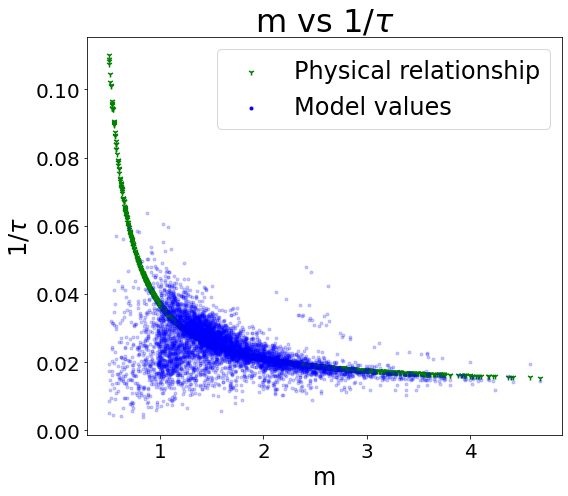

In [12]:
# Values were engineered to fit well the curve
beta_0 = 0.1
en = 1
eg = 2.1
scale = 1
plt.figure(figsize=(8, 7))
plt.scatter(
    m_values[mask],
    calc_turnover(m_values[mask],beta_0, en, eg, scale), 
    color='green',
    marker='1',
    label='Physical relationship'
)
plt.scatter(
    m_values[mask],
    beta_values[mask].reshape(1, -1),
    color='blue',
    marker='.', 
    alpha=.2,
    label='Model values'
)
plt.xlabel('m', fontsize=24)
plt.ylabel(r'$1/\tau$', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title(r'm vs $1/\tau$', fontsize=32)
lgd = plt.legend(fontsize=24)
for lh in lgd.legendHandles:
    lh.set_alpha(1)
plt.tight_layout()
plt.savefig('figures/examples/m_vs_turnover.png')